In [ ]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Import and read the charity_data.csv
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Determine the number of unique values in each column
unique_values = application_df.nunique()

# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Choose a cutoff value and create a list of application types to be replaced
cutoff_value = 10
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
cutoff_value = 10
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Convert categorical data to numeric with pd.get_dummies
application_df = pd.get_dummies(application_df)

# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns=['IS_SUCCESSFUL'])
y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance and scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Epoch 1/100
858/858 [==============================] - 7s 5ms/step - loss: 0.5707 - accuracy: 0.7205 - val_loss: 0.5656 - val_accuracy: 0.7261
Epoch 2/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5538 - accuracy: 0.7305 - val_loss: 0.5598 - val_accuracy: 0.7243
Epoch 3/100
858/858 [==============================] - 6s 7ms/step - loss: 0.5500 - accuracy: 0.7320 - val_loss: 0.5641 - val_accuracy: 0.7287
Epoch 4/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5473 - accuracy: 0.7322 - val_loss: 0.5555 - val_accuracy: 0.7261
Epoch 5/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5459 - accuracy: 0.7329 - val_loss: 0.5586 - val_accuracy: 0.7290
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5448 - accuracy: 0.7345 - val_loss: 0.5569 - val_accuracy: 0.7297
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.7349 - val_loss: 0.5560 - val_accuracy: 0.7297

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


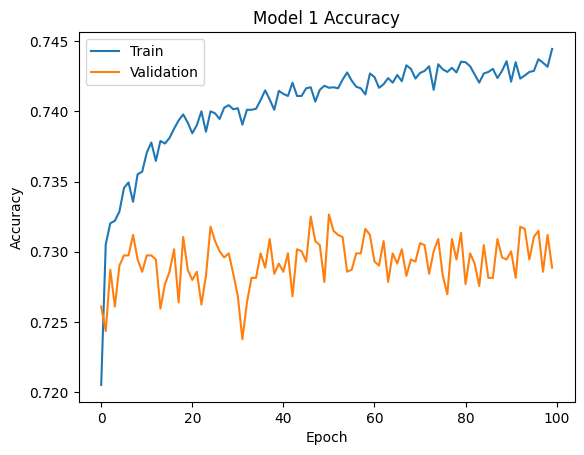

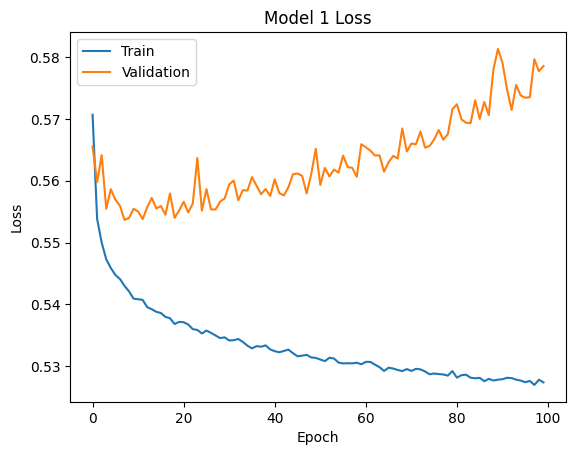

In [ ]:
# Model 1 - Increased Number of Neurons

# Define the first model with increased number of neurons
def create_model_1(input_features, nodes_layer1=128, nodes_layer2=64, learning_rate=0.001):
    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=nodes_layer1, input_dim=input_features, activation='relu'))
    nn.add(tf.keras.layers.Dense(units=nodes_layer2, activation='relu'))
    nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return nn

# Create, train, and evaluate the first model
number_input_features = X_train_scaled.shape[1]
model_1 = create_model_1(number_input_features)
history_1 = model_1.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))
model_loss_1, model_accuracy_1 = model_1.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Model 1 - Loss: {model_loss_1}, Accuracy: {model_accuracy_1}")

# Save the first model
model_1.save('AlphabetSoupCharity_Optimization_1.h5')

# Plot the training and validation loss and accuracy for Model 1
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/100
858/858 [==============================] - 9s 8ms/step - loss: 0.5667 - accuracy: 0.7241 - val_loss: 0.5596 - val_accuracy: 0.7271
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7309 - val_loss: 0.5558 - val_accuracy: 0.7283
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7316 - val_loss: 0.5565 - val_accuracy: 0.7267
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5455 - accuracy: 0.7343 - val_loss: 0.5542 - val_accuracy: 0.7267
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7338 - val_loss: 0.5533 - val_accuracy: 0.7302
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5435 - accuracy: 0.7342 - val_loss: 0.5653 - val_accuracy: 0.7270
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7357 - val_loss: 0.5522 - val_accuracy: 0.7313

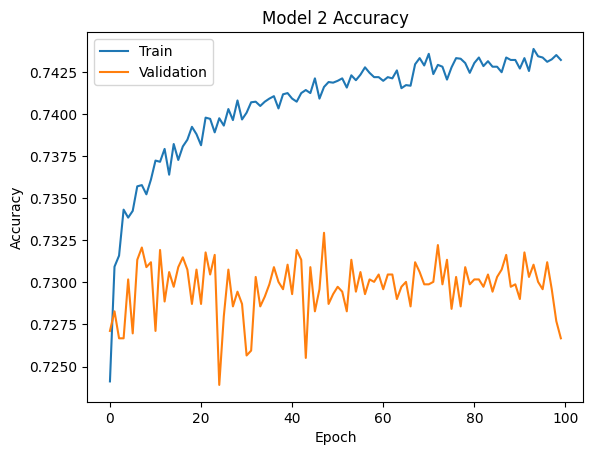

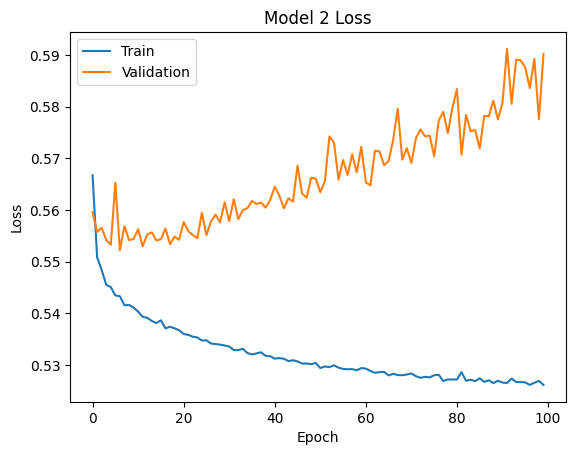

In [ ]:
# Model 2: Added Hidden Layer
def create_model_2(input_features, nodes_layer1=80, nodes_layer2=60, nodes_layer3=40, learning_rate=0.001):
    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=nodes_layer1, input_dim=input_features, activation='relu'))
    nn.add(tf.keras.layers.Dense(units=nodes_layer2, activation='relu'))
    nn.add(tf.keras.layers.Dense(units=nodes_layer3, activation='relu'))
    nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return nn

# Create, train, and evaluate the second model
number_input_features = X_train_scaled.shape[1]
model_2 = create_model_2(number_input_features)
history_2 = model_2.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))
model_loss_2, model_accuracy_2 = model_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Model 2 - Loss: {model_loss_2}, Accuracy: {model_accuracy_2}")

# Save the second model
model_2.save('AlphabetSoupCharity_Optimization_2.h5')

# Plot the training and validation loss and accuracy for Model 2
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/100
858/858 [==============================] - 6s 5ms/step - loss: 0.5769 - accuracy: 0.7140 - val_loss: 0.5668 - val_accuracy: 0.7239
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5551 - accuracy: 0.7288 - val_loss: 0.5600 - val_accuracy: 0.7305
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7333 - val_loss: 0.5574 - val_accuracy: 0.7265
Epoch 4/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5471 - accuracy: 0.7341 - val_loss: 0.5573 - val_accuracy: 0.7289
Epoch 5/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5450 - accuracy: 0.7329 - val_loss: 0.5552 - val_accuracy: 0.7274
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7339 - val_loss: 0.5568 - val_accuracy: 0.7300
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5428 - accuracy: 0.7329 - val_loss: 0.5562 - val_accuracy: 0.7274

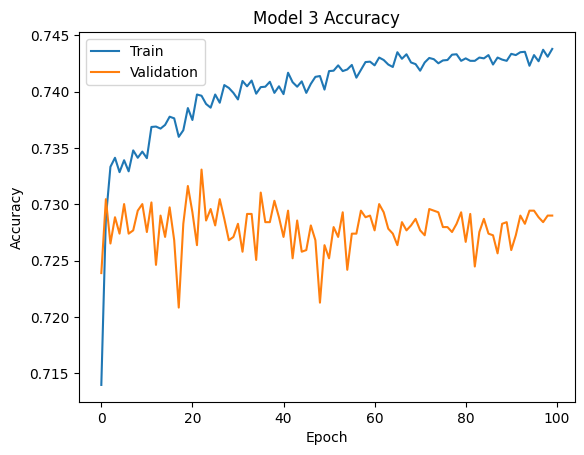

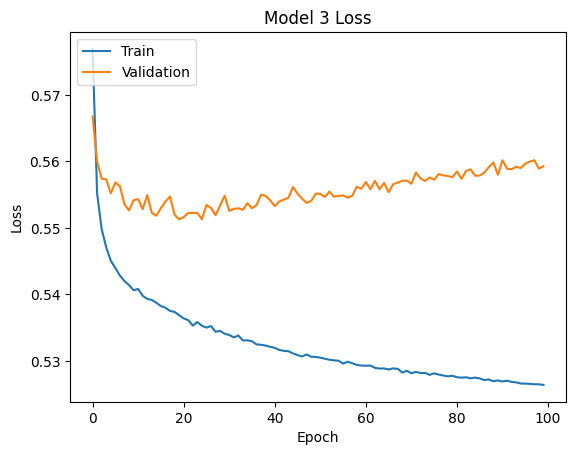

In [ ]:
# Model 3: Different Activation Functions and Adjusted Learning Rate
def create_model_3(input_features, nodes_layer1=80, nodes_layer2=40, learning_rate=0.0005):
    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=nodes_layer1, input_dim=input_features, activation='tanh'))
    nn.add(tf.keras.layers.Dense(units=nodes_layer2, activation='tanh'))
    nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return nn

# Create, train, and evaluate the third model
number_input_features = X_train_scaled.shape[1]
model_3 = create_model_3(number_input_features)
history_3 = model_3.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))
model_loss_3, model_accuracy_3 = model_3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Model 3 - Loss: {model_loss_3}, Accuracy: {model_accuracy_3}")

# Save the third model
model_3.save('AlphabetSoupCharity_Optimization_3.h5')

# Plot the training and validation loss and accuracy for Model 3
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Save the first model
model_1.save('AlphabetSoupCharity_Optimization_1.h5')

# Save the second model
model_2.save('AlphabetSoupCharity_Optimization_2.h5')

# Save the third model
model_3.save('AlphabetSoupCharity_Optimization_3.h5')